# Titanic: Survival prediction
## Data cleaning and EDA. Explore relationship between variables, identify patterns and trends

The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Acknowledgements:
This dataset has been referred from Kaggle: https://www.kaggle.com/c/titanic/data.

Objective of this Task:
Understand the Dataset & cleanup (if required).

Future Objective
Build a strong classification model to predict whether the passenger survives or not.
Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

### Load data and install packages

#### Load library

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load data

In [113]:
df = pd.read_csv("Titanic_Dataset.csv")

### Describe and explore the data (EDA)

#### First 5 rows

In [114]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Last 5 rows

In [115]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Numbers of Rows and Columns

In [116]:
df.shape

(891, 12)

#### Information of Columns

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Checck for misssing values

In [118]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This shows that there are 891 records. In Age, Cabin and Embarked columns some values are missing.

#### Describe the numerical Columns

In [119]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Describe categorical columns

In [120]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


#### Count the number of unique values in columns

In [121]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Handling Missing Values

Fill Missing values of Age with median of all ages

In [122]:
#df['Age'].fillna(df['Age'].median(),inplace=True)
df.fillna({'Age':df['Age'].median()},inplace=True)

Fill Missing Values of Embarked with mode of Embarked

In [123]:
mo = df['Embarked'].mode()
print(mo)

0    S
Name: Embarked, dtype: object


In [126]:

df.fillna({'Embarked':'S'},inplace=True)

As there are many missing values in Cabin So for now we are dropping the entire column. In the future we would have handle it differently.

In [124]:
df.drop(columns=['Cabin'], inplace=True)

Verify For Missisng Values

In [127]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### POINT 1 Save Data as CSV

In [128]:
df.to_csv('Titanic Data After Handling Missing Values.csv', index=False)

### Data Visualization

#### Count of Passengers by Sex

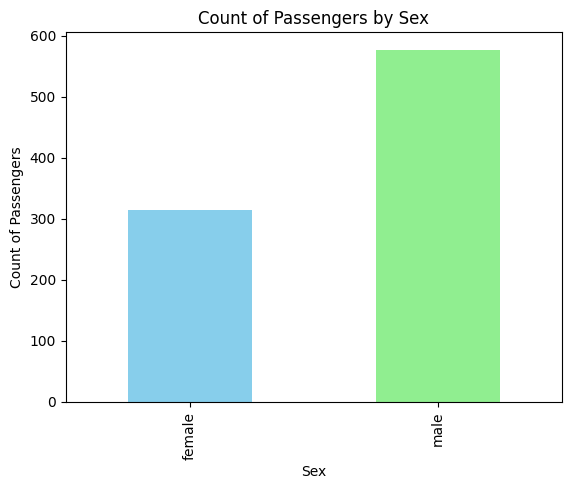

In [129]:
# Group by 'Sex' and count the 'PassengerId'
sex_counts = df.groupby('Sex')['PassengerId'].count()

# Create a bar chart
sex_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])

# Add labels and title
plt.title('Count of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count of Passengers')

# Show the plot
plt.show()

#### Histogram of Passenger Ages

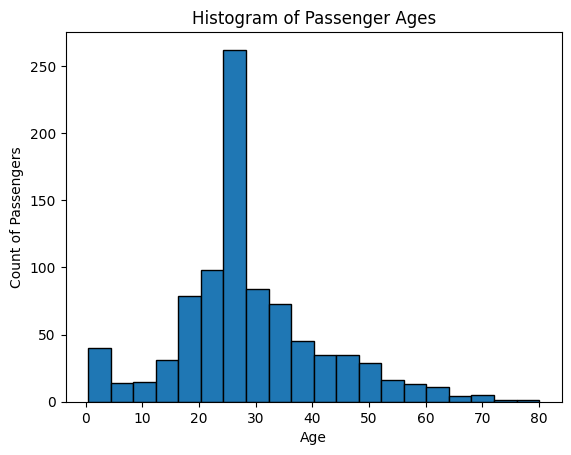

In [130]:
# Create a histogram for Age
plt.hist(df['Age'], bins=20, edgecolor='black')

# Add labels and title
plt.title('Histogram of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')

# Show the plot
plt.show()

#### Histogram of Fare 

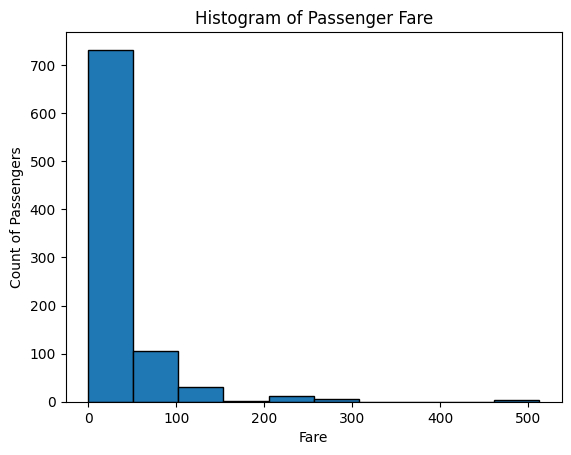

In [131]:
# Create a histogram for Age
plt.hist(df['Fare'], bins=10, edgecolor='black')

# Add labels and title
plt.title('Histogram of Passenger Fare')
plt.xlabel('Fare')
plt.ylabel('Count of Passengers')
#plt.xticks(rotation=90)

# Show the plot
plt.show()

#### Passenger Count by Embarked

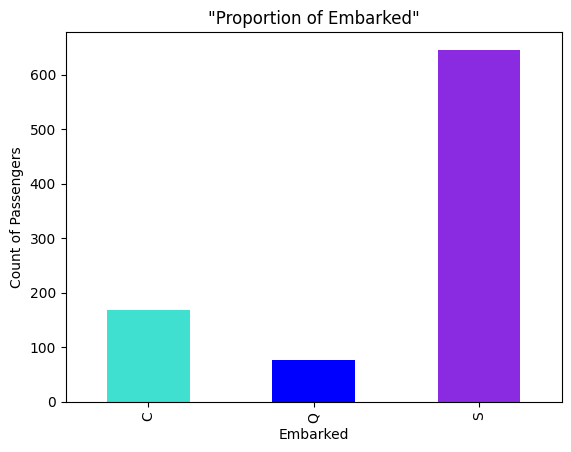

In [132]:
# Group by 'Embarked' and count the 'PassengerId'
Embarked_counts = df.groupby('Embarked')['PassengerId'].count()

# Create a bar chart
Embarked_counts.plot(kind='bar', color=["turquoise", "blue", "blueviolet"])

# Add labels and title
plt.title('"Proportion of Embarked"')
plt.xlabel('Embarked')
plt.ylabel('Count of Passengers')

# Show the plot
plt.show()

#### Count of Suvived Or Not

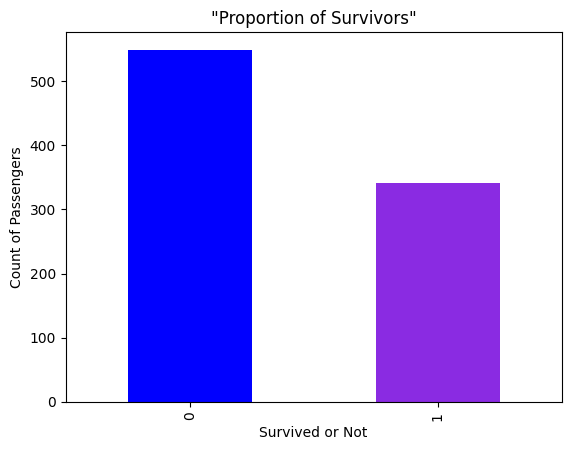

In [133]:
# Group by 'Embarked' and count the 'PassengerId'
Survived_counts = df.groupby('Survived')['PassengerId'].count()

# Create a bar chart
Survived_counts.plot(kind='bar', color=["blue", "blueviolet"])

# Add labels and title
plt.title('"Proportion of Survivors"')
plt.xlabel('Survived or Not')
plt.ylabel('Count of Passengers')

# Show the plot
plt.show()                                                                                

#### Count of Passenger by SibSp 

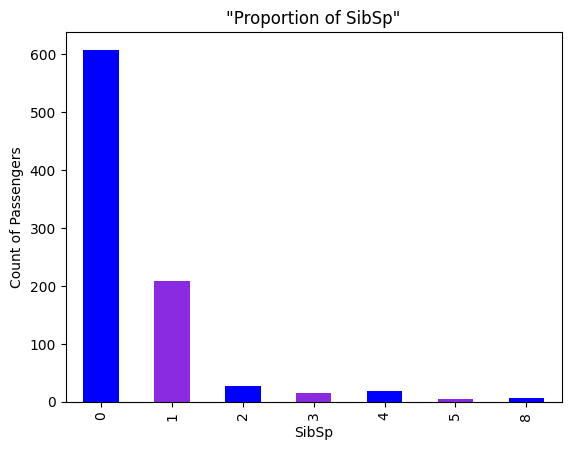

In [134]:
# Group by 'SibSp' and count the 'PassengerId'
Sibsp_counts = df.groupby('SibSp')['PassengerId'].count()

# Create a bar chart
Sibsp_counts.plot(kind='bar', color=["blue", "blueviolet"])

# Add labels and title
plt.title('"Proportion of SibSp"')
plt.xlabel('SibSp')
plt.ylabel('Count of Passengers')

# Show the plot
plt.show()                                                                                

#### Count of Passenger By Parch

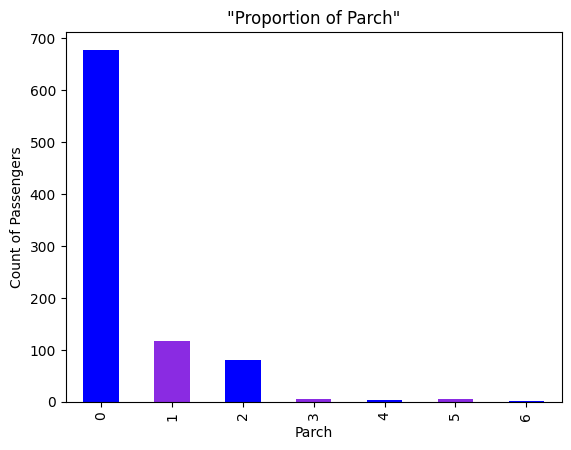

In [135]:
# Group by 'Parch' and count the 'PassengerId'
Parch_counts = df.groupby('Parch')['PassengerId'].count()

# Create a bar chart
Parch_counts.plot(kind='bar', color=["blue", "blueviolet"])

# Add labels and title
plt.title('"Proportion of Parch"')
plt.xlabel('Parch')
plt.ylabel('Count of Passengers')

# Show the plot
plt.show() 

### RelationShips Between Variables

 #### Visualize the Survival rate by passenger class (Pclass)::

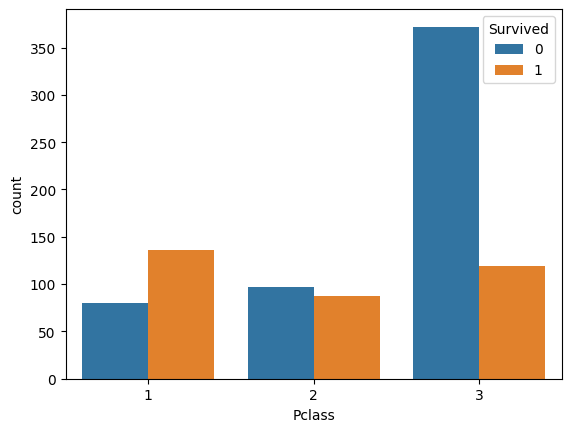

In [136]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()

#### Age distribution by Survival

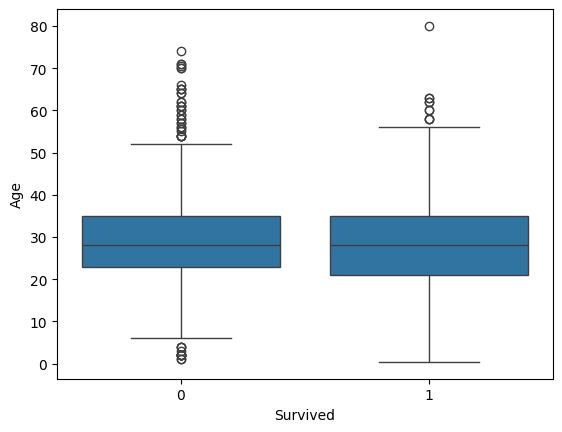

In [137]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.show()

#### Fare vs Survival

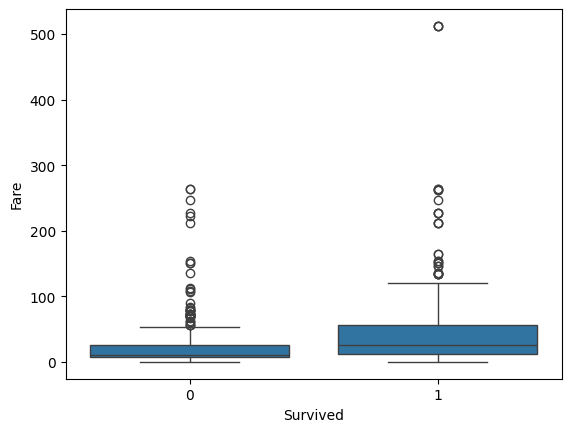

In [138]:
sns.boxplot(x='Survived', y = 'Fare', data = df)
plt.show()

There seems a outliers in the survived = 1 fare

#### Remove Outliers

From close inspection it is found that the passengers with passengerids 259, 680 and 738 have same ticket and fare. The Fare 512.3923 is however twice than the largest of all others (263). These three values seems to be outliers and may have great effect on the correlation

In [139]:
# Define the PassengerIds to remove
ids_to_remove = [259, 680, 738]

# Remove rows where 'PassengerId' is in the list
df = df[~df['PassengerId'].isin(ids_to_remove)]

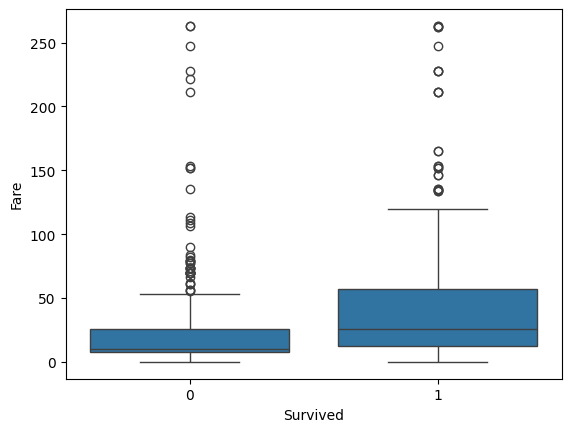

In [140]:
sns.boxplot(x='Survived', y = 'Fare', data = df)
plt.show()

### Correlation Matrix / Heat Map

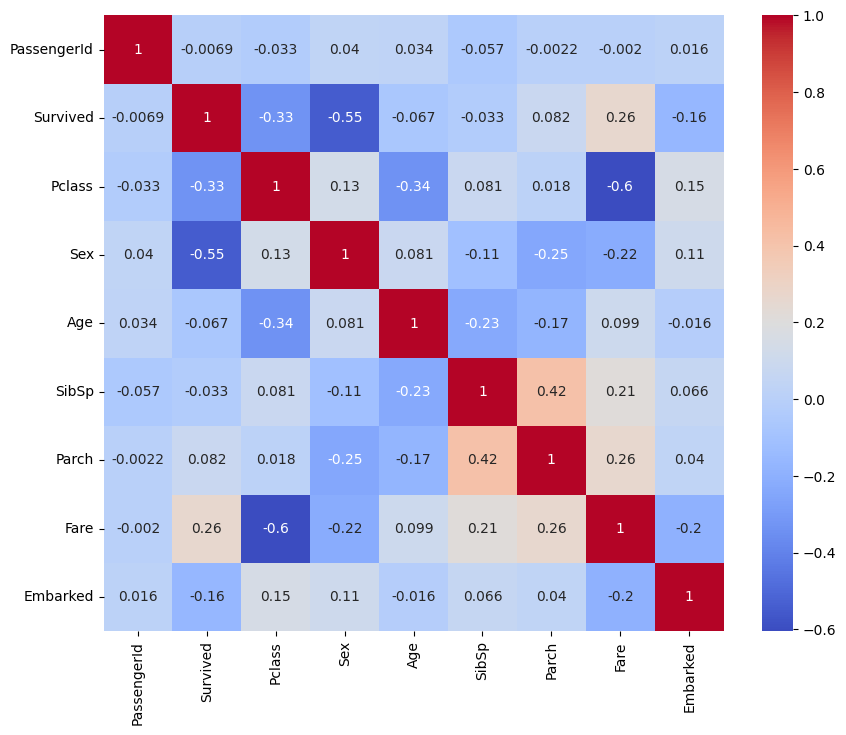

In [146]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

From the Matrix we can say that Fare and pclass has more effect on the survival chance.

### Preparing Data For Modeling

#### Label Encoding

Label encoding is useful when the categorical variable has an inherent order. For example, if you have a column like Pclass with values '1', '2', '3', which represent different classes, label encoding might be appropriate.

In [142]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['Embarked', 'Sex']  

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0


It substitude 1 for Male and 0 for Female, and 0 for C, 2 for S and 1 for Q.

##### One-hot Encode categorical variables
One-Hot Encoding: Creates separate columns for each category with binary values. Use pd.get_dummies() for this.

#### Normalization


Normalization is a technique in data preprocessing where numerical data is scaled to a specific range, often between 0 and 1, or transformed to have certain statistical properties, like a mean of 0 and a standard deviation of 1. It’s commonly used in machine learning and data analysis to ensure that features with different scales (e.g., age in years vs. income in thousands) don't disproportionately influence the model.

#### Removing Unwanted Columns

In [143]:
# Drop 'Name' and 'Ticket' columns
df_cleaned = df.drop(columns=['Name', 'Ticket'])

#### Cleaned Data

In [144]:
df_cleaned.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
5,6,0,3,1,28.0,0,0,8.4583,1
6,7,0,1,1,54.0,0,0,51.8625,2
7,8,0,3,1,2.0,3,1,21.0750,2
8,9,1,3,0,27.0,0,2,11.1333,2
9,10,1,2,0,14.0,1,0,30.0708,0


#### Save data in CSV file

In [145]:
# Save the cleaned DataFrame to a CSV file
df_cleaned.to_csv('Titanic data cleaned ready to Modeling.csv', index=False)

### Modeling

#### Split the Data into Training and Testing Sets:

### Build prediction models

### Make Prediction on Test Data

### Evaluate Model